In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import mne
import os
import seaborn as sns

from environment_info import *
from patient_info import *
#import environment_info

# now we have data_dir, scripts_dir, and root_dir

sns.set()

In [3]:
def conv_montage(file):
    montage_array = (''.join([chr(i) for i in file['Montage']['MontageString']])).split(' ')
    return montage_array

def get_num_chans(file):
    num_chans = int(np.sum(list(file['Montage']['Montage'])))
    return num_chans
    

In [4]:
# define path of interest for a particular patient
path_int = os.path.join(data_dir,patient_names[1]+data_file_suffix)

# load in the file
f = h5py.File(path_int,'r')


In [5]:
# generate a random sequence for the number of channels 

# get the number of channels
num_chans = get_num_chans(f)

# generate a random sequence
random_seq = np.random.permutation(num_chans)

# get the montage
montage = conv_montage(f)


### power

In [6]:
labels_data = list(f['power'].keys())
freq_names = list(f['power'][labels_data[0]])
freq_names
power_trials = np.squeeze(np.array([[f['power'][interest][interest_freq] for interest_freq in  f['power'][interest]] for interest in labels_data]))

In [75]:
f['power'][labels_data[0]][freq_names[0]]

<HDF5 dataset "HG": shape (82, 1), type "<f8">

In [26]:
power_trials.shape

(3, 12, 82)

### connectivity

In [83]:
labels_data = list(f['connectivity'].keys())
connectivity_names = list(f['connectivity'][labels_data[0]].keys())
freq_names = list(f['connectivity'][labels_data[0]][connectivity_names[0]].keys())

connectivity_trials = np.squeeze(np.array([[[np.array([f['connectivity'][interest][interest_con][interest_meas]]) for interest_meas in f['connectivity'][interest][interest_con]] for interest_con in  f['connectivity'][interest]] for interest in labels_data]))

In [84]:
f['connectivity'][labels_data[0]][connectivity_names[0]][freq_names[0]]

<HDF5 dataset "HG": shape (82, 82), type "<f8">

In [85]:
connectivity_names
freq_names

['HG',
 'HGstd',
 'alpha',
 'alphastd',
 'beta',
 'betastd',
 'delta',
 'deltastd',
 'gamma',
 'gammastd',
 'theta',
 'thetastd']

In [93]:
connectivity_trials[0][0].shape

AttributeError: 'list' object has no attribute 'shape'

In [87]:
labels_data
connectivity_names

['corrs', 'plv', 'psi']

### raw signal

In [44]:
labels_data = list(f['data'].keys())
signal_mat = np.array([f['data'][interest][:] for interest in labels_data])

In [45]:
signal_mat.shape

(3, 82, 312000)

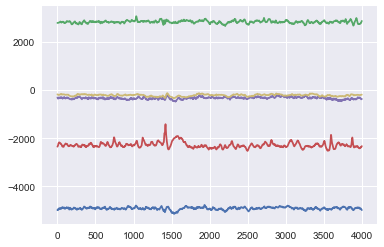

In [56]:
plt.figure()
trial = 1
channel = 60

plt.plot(np.squeeze(signal_mat[trial][channel][50000:54000]))
plt.plot(np.squeeze(signal_mat[trial][channel+1][50000:54000]))
plt.plot(np.squeeze(signal_mat[trial][channel+3][50000:54000]))
plt.plot(np.squeeze(signal_mat[trial][channel+5][50000:54000]))
plt.plot(np.squeeze(signal_mat[trial][channel+10][50000:54000]))

In [47]:
#https://github.com/emanuele/convert_matlab73_hdf5